# 아마존 상품 리뷰 데이터
https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews

## 데이터 로드

In [1]:
# JSONL 파일을 읽어서 JSON 형식으로 출력하기 - 상품 리뷰 텍스트와 평점 
import json
from pprint import pprint

file = "amazon_reviews/Magazine_Subscriptions.jsonl"
with open(file, 'r') as fp:
    for line in fp:
        pprint(json.loads(line.strip()))
        break

{'asin': 'B00HLSSQKK',
 'helpful_vote': 0,
 'images': [],
 'parent_asin': 'B00HLSSQKK',
 'rating': 5.0,
 'text': 'Wonderful recipes in this magazine.',
 'timestamp': 1608046142433,
 'title': 'Great pictures and recipes',
 'user_id': 'AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ',
 'verified_purchase': True}


In [2]:
# JSONL 파일을 읽어서 JSON 형식으로 출력하기 - 메타데이터
file = "amazon_reviews/meta_Magazine_Subscriptions.jsonl"
with open(file, 'r') as fp:
    for line in fp:
        pprint(json.loads(line.strip()))
        break

{'average_rating': 3.6,
 'bought_together': None,
 'categories': [],
 'description': ['Product Description',
                 'Dive into',
                 'GQ',
                 '’s culture-defining covers with Timothée Chalamet, Travis '
                 'Scott, Zendaya, Daniel Craig, LeBron James, and more. From '
                 'dynamic storytelling to elevated style—if it’s at the center '
                 'of the zeitgeist, it’s in the magazine. Subscribe now and '
                 'never miss bleeding-edge fashion from all over the world, '
                 'captivating photography from innovative artists, and '
                 'unforgettable profiles and longform journalism.',
                 'Amazon.com Review',
                 'GQ',
                 "is the flagship of men's fashion and style. To be",
                 'GQ',
                 'is to be forward-looking, progressive and cutting-edge.',
                 'GQ',
                 'is home to some of the most elev

In [3]:
# 전체 파일을 읽어서 데이터프레임으로 정리하기
import pandas as pd

file = "amazon_reviews/Magazine_Subscriptions.jsonl"
data = []
with open(file, 'r') as fp:
    for line in fp:
        data.append(json.loads(line.strip()))

df = pd.DataFrame(data)
print(df.shape)
df.head()

(71497, 10)


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Great pictures and recipes,Wonderful recipes in this magazine.,[],B00HLSSQKK,B00HLSSQKK,AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,1608046142433,0,True
1,4.0,great for kids who love sports!,Great sports magazine that's on my 9 year olds...,[],B002PXW04Y,B002PXW04Y,AHORTSSMI6ZZFUFWMPT4UFR2ISUQ,1470972512000,1,True
2,5.0,A great look at what's new on the kosher scene...,"""Joy of Kosher"" magazine fills a much-needed n...",[],B00HCR5090,B00HCR5090,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1396827173000,4,False
3,5.0,"If you enjoy reading an eye-catching, easy-to-...",I've been addicted to Martha Stewart's Everyda...,[],B0000ARXXS,B0000ARXXS,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1181880255000,4,False
4,1.0,Too many “ gear ads” !!,Too many ads!,[],B0025ZOVEO,B0025ZOVEO,AFUB7CHTXRPD447QVQCHBZVN2IPQ,1591046680246,13,True


### 데이터프레임의 기본 정보 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71497 entries, 0 to 71496
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             71497 non-null  float64
 1   title              71497 non-null  object 
 2   text               71497 non-null  object 
 3   images             71497 non-null  object 
 4   asin               71497 non-null  object 
 5   parent_asin        71497 non-null  object 
 6   user_id            71497 non-null  object 
 7   timestamp          71497 non-null  int64  
 8   helpful_vote       71497 non-null  int64  
 9   verified_purchase  71497 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 5.0+ MB


### 데이터프레임의 통계적 요약 확인

In [5]:
df.describe()

,rating,timestamp,helpful_vote
count,71497.000000,7.149700e+04,71497.000000
mean,4.036729,1.449068e+12,4.453208
std,1.460635,1.321906e+11,30.282014
min,1.000000,1.004125e+12,0.000000
25%,3.000000,1.377989e+12,0.000000
50%,5.000000,1.459554e+12,0.000000
75%,5.000000,1.553039e+12,2.000000
max,5.000000,1.692137e+12,2169.000000


## 결측값 처리

In [6]:
# 결측값 확인
print(df.isnull().sum())

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


In [7]:
# images 열 데이터 확인 -> 데이터가 비어 있는 경우는 결측값으로 판단 ???
df['images'].value_counts(dropna=False)  

images
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          71275
[{'small_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71m36dzwHGL._SL256_.jpg', 'medium_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71m36dzwHGL._SL800_.jpg', 'large_image_url': 'https://images-na.ssl-images-amazon.com/images/I/71m36dzwHGL.jpg', 'attachment_type': 'IMAGE'}]                                                           

## 데이터 타입 변환

In [8]:
# timestamp 컬럼 데이터 확인 - 시간 데이터로 변환 필요
df['timestamp']

0        1608046142433
1        1470972512000
2        1396827173000
3        1181880255000
4        1591046680246
             ...      
71492    1176481717000
71493    1552675210945
71494    1192496001000
71495    1288714432000
71496    1266163391000
Name: timestamp, Length: 71497, dtype: int64

In [9]:
# timestamp 컬럼을 datetime 타입으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['timestamp']

0       2020-12-15 15:29:02.433
1       2016-08-12 03:28:32.000
2       2014-04-06 23:32:53.000
3       2007-06-15 04:04:15.000
4       2020-06-01 21:24:40.246
                  ...          
71492   2007-04-13 16:28:37.000
71493   2019-03-15 18:40:10.945
71494   2007-10-16 00:53:21.000
71495   2010-11-02 16:13:52.000
71496   2010-02-14 16:03:11.000
Name: timestamp, Length: 71497, dtype: datetime64[ns]

## 데이터 정렬 및 필터링

<Axes: >

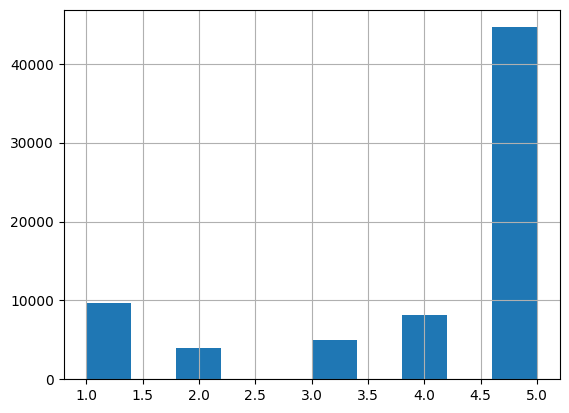

In [10]:
# 평점 데이터 분포 확인
df['rating'].hist()

In [11]:
# 평점이 4.0 이상인 리뷰만 필터링
filtered_df = df[df['rating'] >= 4.0]
print(filtered_df.shape)

(52826, 10)


In [12]:
# helpful_vote  기준으로 정렬
sorted_df = filtered_df.sort_values(by='helpful_vote', ascending=False)
sorted_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
49692,5.0,Beware Amazon's $5 for 12 issues 'deal',"I love the New Yorker, but beware of Amazon's ...",[],B06XWB4X41,B06XWB4X41,AFPY7ERB7DB3ABOHSH4B46XWHNMA,2017-08-07 16:19:45.634,2005,True
39370,5.0,"Interesting, thoughtful articles for kids who ...",My elementary age kids are just beginning to u...,[],B00006FXOV,B00006FXOV,AFZOHE4Z4B5JWCC7C4AN26CPHOGA,2011-05-08 19:12:07.000,1421,True
7045,5.0,"Absolutely fantastic, high end magazine for $5...",It's crazy to get this high quality magazine f...,[{'small_image_url': 'https://images-na.ssl-im...,B0089FUF6W,B0089FUF6W,AE3MTQULT5KJCLJHVPJ4LPMMXXIQ,2017-11-30 20:54:44.148,749,True
7047,5.0,"Great recipes and articles, amazing price with...","I am a magazine junkie, especially when it com...",[{'small_image_url': 'https://images-na.ssl-im...,B01N702LLM,B01N702LLM,AE3MTQULT5KJCLJHVPJ4LPMMXXIQ,2017-10-18 20:16:49.863,675,True
32576,5.0,I loved the magazine when I was a kid,"I was reading reviews, thinking of ordering a ...",[],B00008IHFC,B00008IHFC,AGKKR7NHRBD6DNTZJUNCICWP55TQ,2016-10-21 18:51:35.000,566,True


## 새로운 컬럼 추가 및 기존 컬럼 변환


In [13]:
# 시간 속성을 추출
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
df['microsecond'] = df['timestamp'].dt.microsecond

df[['year', 'month', 'day', 'hour', 'minute', 'second', 'microsecond']].head()

,year,month,day,hour,minute,second,microsecond
0,2020,12,15,15,29,2,433000
1,2016,8,12,3,28,32,0
2,2014,4,6,23,32,53,0
3,2007,6,15,4,4,15,0
4,2020,6,1,21,24,40,246000


0      5
1     10
2    532
3    324
4      3
Name: review_length, dtype: int64


<Axes: >

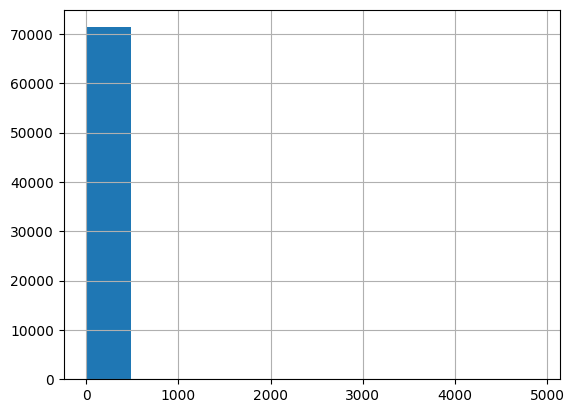

In [14]:
# 리뷰 길이 (단어 수) 추가
df['review_length'] = df['text'].apply(lambda x: len(str(x).split()))

print(df['review_length'].head())

df['review_length'].hist()

In [15]:
# 'verified_purchase' 컬럼을 True/False에서 1/0으로 변환
df['verified_purchase'] = df['verified_purchase'].astype(int)
df['verified_purchase'].value_counts()

verified_purchase
1    58306
0    13191
Name: count, dtype: int64

## 그룹화 및 집계

In [16]:
# 평점별 리뷰 수 집계
rating_counts = df.groupby('rating').size()
rating_counts

rating
1.0     9685
2.0     3953
3.0     5033
4.0     8206
5.0    44620
dtype: int64

In [17]:
# 평점별 평균 리뷰 길이 집계
avg_review_length = df.groupby('rating')['review_length'].mean()
avg_review_length

rating
1.0    52.808880
2.0    63.360486
3.0    51.741903
4.0    45.782720
5.0    30.101793
Name: review_length, dtype: float64

In [18]:
# 동일한 유저가 있는지 확인
user_counts = df.groupby('user_id').size().sort_values(ascending=False)
user_counts

user_id
AFERCDY2EFJKT7QUQ75GISNHTFOQ    61
AEESP3UFZFWPXGH7YROPR55LVWHA    35
AGCK7OO3T5VA4XRDC2IR4LETU57A    23
AG3PVUKTDCJXOOPUKVOEGDDEHTPQ    20
AFJINHDZJTPW5JEPESQSRKPTJQ5Q    20
                                ..
AHZZ7GPN63TEIWPH3ZLZAJL2BYZQ     1
AHZZHZWI5HAOFSD3BX6C3YP3DBSQ     1
AECNXK7YNN6SDL6USZYCYVUBLYGA     1
AECNZF5XRUBLBUJTDACPH5LC5V7A     1
AE23DPQHFEYWVNYR5CV6QNINOBJQ     1
Length: 60144, dtype: int64

In [19]:
# 유저별 평균 평점, 리뷰 수, 리뷰 길이 집계
user_summary = df.groupby('user_id').agg({'rating': 'mean', 'text': 'size', 'review_length': 'mean'})
user_summary = user_summary.rename(columns={'rating': 'avg_rating', 'text': 'review_count', 'review_length': 'avg_review_length'})
user_summary = user_summary.sort_values(by='review_count', ascending=False)
user_summary.head()

,avg_rating,review_count,avg_review_length
user_id,,,
AFERCDY2EFJKT7QUQ75GISNHTFOQ,3.721311,61,412.770492
AEESP3UFZFWPXGH7YROPR55LVWHA,1.000000,35,279.085714
AGCK7OO3T5VA4XRDC2IR4LETU57A,5.000000,23,8.260870
AG3PVUKTDCJXOOPUKVOEGDDEHTPQ,4.350000,20,16.750000
AFJINHDZJTPW5JEPESQSRKPTJQ5Q,3.900000,20,105.350000


## [실습] 메타데이터 전처리

In [20]:
# metadata 파일을 읽어서 데이터프레임으로 정리하기
file = "amazon_reviews/meta_Magazine_Subscriptions.jsonl"
data = []
with open(file, 'r') as fp:
    for line in fp:
        data.append(json.loads(line.strip()))

df_meta = pd.DataFrame(data)
print(df_meta.shape)
df_meta.head()

(3391, 16)


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Magazine Subscriptions,GQ Print Access Print Magazine,3.6,10,[],"[Product Description, Dive into, GQ, ’s cultur...",None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Conde Nast Publications,[],"{'Date First Available': 'June 2, 2020', 'Manu...",B00FA7T630,None,NaN,NaN
1,Magazine Subscriptions,Hi-Fi + Print Magazine,4.4,44,[],[Hi-Fi+ is Europe's premier English-language h...,None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Absolute Media Ltd/Hi-Fi+,"[Magazine Subscriptions, Arts, Music & Photogr...","{'Date First Available': 'September 19, 2013',...",B00F8P62PO,None,NaN,NaN
2,Magazine Subscriptions,Paper Crafts,3.0,3,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],None,[],"{'Date First Available': 'May 12, 2021'}",B003F1W9T6,None,NaN,NaN
3,Magazine Subscriptions,Horse Illustrated,4.5,284,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Eg Media Investments Llc,"[Magazine Subscriptions, Sports, Recreation & ...",{'Package Dimensions': '10.79 x 8.11 x 0.31 in...,B00007AXX1,None,NaN,NaN
4,Magazine Subscriptions,Motorcyclist,3.0,10,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[],None,"[Magazine Subscriptions, Professional & Educat...","{'Date First Available': 'April 30, 2015'}",B00007AZS2,None,NaN,NaN


In [21]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    3391 non-null   object 
 1   title            3391 non-null   object 
 2   average_rating   3391 non-null   float64
 3   rating_number    3391 non-null   int64  
 4   features         3391 non-null   object 
 5   description      3391 non-null   object 
 6   price            1 non-null      object 
 7   images           3391 non-null   object 
 8   videos           3391 non-null   object 
 9   store            3214 non-null   object 
 10  categories       3391 non-null   object 
 11  details          3391 non-null   object 
 12  parent_asin      3391 non-null   object 
 13  bought_together  0 non-null      object 
 14  subtitle         1 non-null      object 
 15  author           0 non-null      float64
dtypes: float64(2), int64(1), object(13)
memory usage: 424.0+ KB


In [22]:
df_meta.describe()

,average_rating,rating_number,author
count,3391.000000,3391.000000,0.0
mean,4.114244,347.483338,NaN
std,0.845572,1546.889973,NaN
min,1.000000,1.000000,NaN
25%,3.900000,4.000000,NaN
50%,4.300000,17.000000,NaN
75%,4.600000,98.000000,NaN
max,5.000000,24461.000000,NaN


In [23]:
df_meta.isnull().sum()  

main_category         0
title                 0
average_rating        0
rating_number         0
features              0
description           0
price              3390
images                0
videos                0
store               177
categories            0
details               0
parent_asin           0
bought_together    3391
subtitle           3390
author             3391
dtype: int64

In [24]:
# 결측치가 있는 컬럼 데이터 확인
for col in df_meta.columns:
    if df_meta[col].isnull().sum() > 0:
        print(f"{col}: {df_meta[col].unique()}")
        print("--------------------\n")

price: [None '—']
--------------------

store: ['Conde Nast Publications' 'Absolute Media Ltd/Hi-Fi+' None ...
 'Visionaire Publishing' 'Dept English Univ Victoria' 'Rcs Periodici Spa']
--------------------

bought_together: [None]
--------------------

subtitle: [nan 'Print Magazine']
--------------------

author: [nan]
--------------------



In [25]:
# price, bought_together, subtitle, author 컬럼 제거
df_meta = df_meta.drop(columns=['price', 'bought_together', 'subtitle', 'author'])
df_meta.head()

,main_category,title,average_rating,rating_number,features,description,images,videos,store,categories,details,parent_asin
0,Magazine Subscriptions,GQ Print Access Print Magazine,3.6,10,[],"[Product Description, Dive into, GQ, ’s cultur...",[{'thumb': 'https://m.media-amazon.com/images/...,[],Conde Nast Publications,[],"{'Date First Available': 'June 2, 2020', 'Manu...",B00FA7T630
1,Magazine Subscriptions,Hi-Fi + Print Magazine,4.4,44,[],[Hi-Fi+ is Europe's premier English-language h...,[{'thumb': 'https://m.media-amazon.com/images/...,[],Absolute Media Ltd/Hi-Fi+,"[Magazine Subscriptions, Arts, Music & Photogr...","{'Date First Available': 'September 19, 2013',...",B00F8P62PO
2,Magazine Subscriptions,Paper Crafts,3.0,3,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,[],None,[],"{'Date First Available': 'May 12, 2021'}",B003F1W9T6
3,Magazine Subscriptions,Horse Illustrated,4.5,284,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,[],Eg Media Investments Llc,"[Magazine Subscriptions, Sports, Recreation & ...",{'Package Dimensions': '10.79 x 8.11 x 0.31 in...,B00007AXX1
4,Magazine Subscriptions,Motorcyclist,3.0,10,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,[],None,"[Magazine Subscriptions, Professional & Educat...","{'Date First Available': 'April 30, 2015'}",B00007AZS2


## 데이터 병합

In [26]:
df.head(1)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,year,month,day,hour,minute,second,microsecond,review_length
0,5.0,Great pictures and recipes,Wonderful recipes in this magazine.,[],B00HLSSQKK,B00HLSSQKK,AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,2020-12-15 15:29:02.433,0,1,2020,12,15,15,29,2,433000,5


In [27]:
df_meta.head(1)

,main_category,title,average_rating,rating_number,features,description,images,videos,store,categories,details,parent_asin
0,Magazine Subscriptions,GQ Print Access Print Magazine,3.6,10,[],"[Product Description, Dive into, GQ, ’s cultur...",[{'thumb': 'https://m.media-amazon.com/images/...,[],Conde Nast Publications,[],"{'Date First Available': 'June 2, 2020', 'Manu...",B00FA7T630


In [28]:
# ASIN (Amazon Standard Identification Number) 기준으로 두 데이터프레임 병합 - 여기서는 parent_asin을 사용

df_merged = pd.merge(df, df_meta, on='parent_asin', how='left')   # 상품 리뷰를 기준으로 결합 (many-to-one)
print(df_merged.shape)
df_merged.head()

(71497, 29)


,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,title_y,average_rating,rating_number,features,description,images_y,videos,store,categories,details
0,5.0,Great pictures and recipes,Wonderful recipes in this magazine.,[],B00HLSSQKK,B00HLSSQKK,AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,2020-12-15 15:29:02.433,0,1,...,Cooking With Paula Deen,4.6,538,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,[],Hoffman Media Inc,"[Magazine Subscriptions, Cooking, Food & Wine,...","{'Date First Available': 'December 30, 2013'}"
1,4.0,great for kids who love sports!,Great sports magazine that's on my 9 year olds...,[],B002PXW04Y,B002PXW04Y,AHORTSSMI6ZZFUFWMPT4UFR2ISUQ,2016-08-12 03:28:32.000,1,1,...,Sports Illustrated KIDS Print Magazine,4.3,2363,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,[],Maven,"[Magazine Subscriptions, Sports, Recreation & ...","{'Date First Available': 'September 25, 2014'}"
2,5.0,A great look at what's new on the kosher scene...,"""Joy of Kosher"" magazine fills a much-needed n...",[],B00HCR5090,B00HCR5090,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2014-04-06 23:32:53.000,4,0,...,Joy of Kosher With Jamie Geller Print Magazine,5.0,5,[],"[Joy of Kosher magazine is an exciting, high e...",[{'thumb': 'https://m.media-amazon.com/images/...,[],Kosher Media Network Llc,"[Magazine Subscriptions, Cooking, Food & Wine,...","{'Date First Available': 'December 16, 2013', ..."
3,5.0,"If you enjoy reading an eye-catching, easy-to-...",I've been addicted to Martha Stewart's Everyda...,[],B0000ARXXS,B0000ARXXS,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2007-06-15 04:04:15.000,4,0,...,Everyday Food,3.6,52,[],[],[{'thumb': 'https://m.media-amazon.com/images/...,[],None,[],"{'Date First Available': 'April 30, 2015'}"
4,1.0,Too many “ gear ads” !!,Too many ads!,[],B0025ZOVEO,B0025ZOVEO,AFUB7CHTXRPD447QVQCHBZVN2IPQ,2020-06-01 21:24:40.246,13,1,...,Outside Print Magazine,4.3,355,[],"[Product Description, Outside covers the excit...",[{'thumb': 'https://m.media-amazon.com/images/...,[],Outside,"[Magazine Subscriptions, Sports, Recreation & ...","{'Date First Available': 'April 8, 2009', 'Man..."


In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71497 entries, 0 to 71496
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             71497 non-null  float64       
 1   title_x            71497 non-null  object        
 2   text               71497 non-null  object        
 3   images_x           71497 non-null  object        
 4   asin               71497 non-null  object        
 5   parent_asin        71497 non-null  object        
 6   user_id            71497 non-null  object        
 7   timestamp          71497 non-null  datetime64[ns]
 8   helpful_vote       71497 non-null  int64         
 9   verified_purchase  71497 non-null  int64         
 10  year               71497 non-null  int32         
 11  month              71497 non-null  int32         
 12  day                71497 non-null  int32         
 13  hour               71497 non-null  int32         
 14  minute

In [30]:
df_merged.isnull().sum()    

rating                  0
title_x                 0
text                    0
images_x                0
asin                    0
parent_asin             0
user_id                 0
timestamp               0
helpful_vote            0
verified_purchase       0
year                    0
month                   0
day                     0
hour                    0
minute                  0
second                  0
microsecond             0
review_length           0
main_category           0
title_y                 0
average_rating          0
rating_number           0
features                0
description             0
images_y                0
videos                  0
store                1168
categories              0
details                 0
dtype: int64

In [31]:
df_merged['store'].value_counts(dropna=False)

store
Hearst Magazines                    10878
Meredith Corporation                 8280
Trusted Media Brands, Inc.           6585
National Geographic Partners LLC     3663
Bonnier Corporation                  2475
                                    ...  
Crafts Council                          1
Custom Publishing France                1
H&S Publishing Llc                      1
Essential Publications Us Llc           1
TOPIX MEDIA LAB                         1
Name: count, Length: 1265, dtype: int64

### 평점과 리뷰 길이의 상관관계 분석

In [32]:
# 평점과 리뷰 길이의 상관관계 분석
correlation = df_merged[['rating', 'review_length']].corr()

print("평점과 리뷰 길이의 상관관계:\n", correlation)

평점과 리뷰 길이의 상관관계:
                  rating  review_length
rating         1.000000      -0.158644
review_length -0.158644       1.000000


### 시간에 따른 리뷰 트렌드 분석

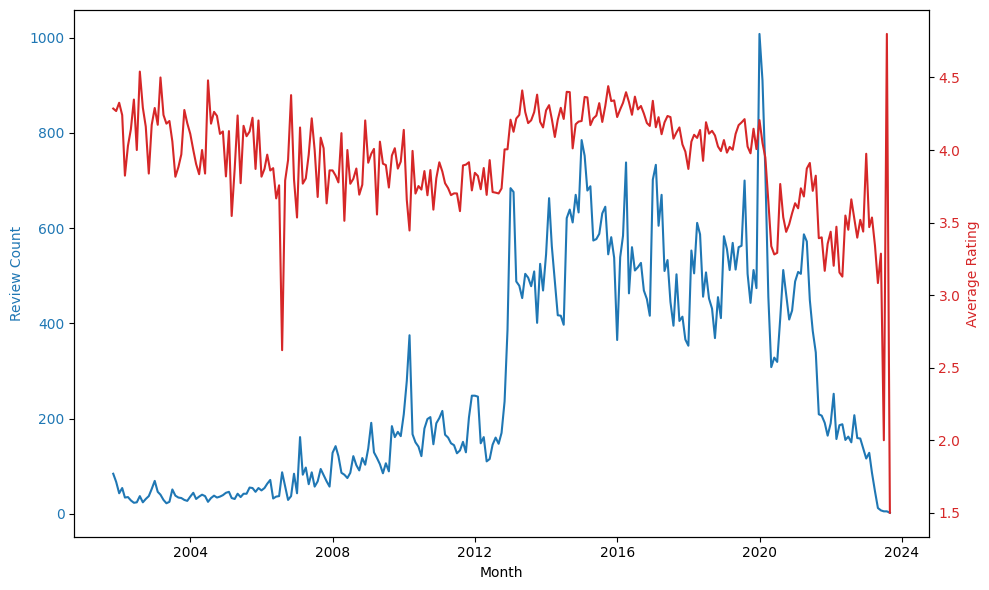

In [33]:
import matplotlib.pyplot as plt

# 월별 리뷰 개수와 평균 평점 계산
monthly_reviews = df_merged.resample('ME', on='timestamp').agg({'rating': ['count', 'mean']})

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Review Count', color=color)
ax1.plot(monthly_reviews.index, monthly_reviews['rating']['count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Rating', color=color)
ax2.plot(monthly_reviews.index, monthly_reviews['rating']['mean'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


### 각 주제별 리뷰 특징 분석

Category: Books
a: 5
gardening: 4
great: 3
magazine: 3
for: 3
the: 3
gardener: 2
know: 2
has: 2
and: 2


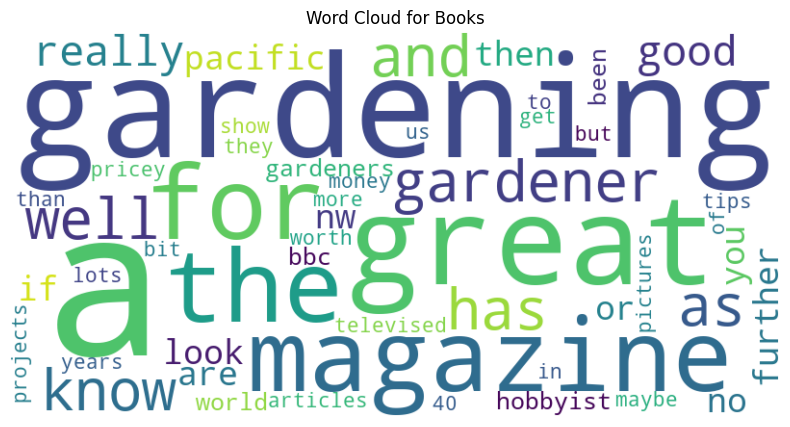

Category: Magazine Subscriptions
the: 116619
i: 84346
and: 82435
to: 75039
a: 66473
of: 52184
magazine: 50304
it: 49189
for: 43321
this: 41688


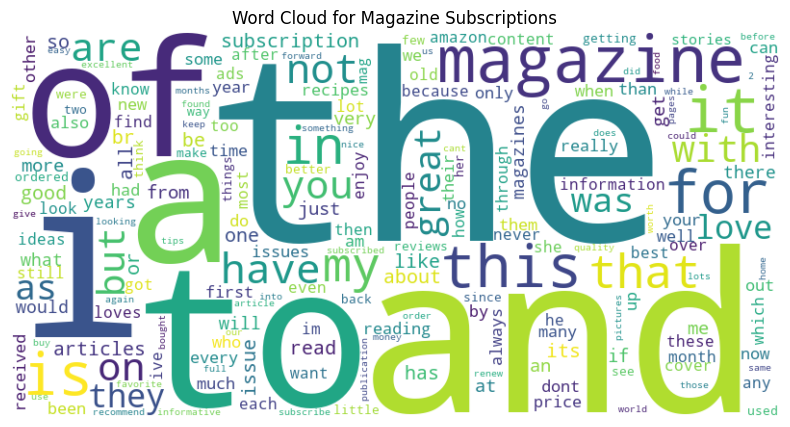

In [34]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 전처리 함수 정의
def preprocess_text(text):
    # 소문자 변환 및 특수 문자 제거
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # isalnum(): 영문자, 숫자 여부 확인, isspace(): 공백 여부 확인
    return text

# 모든 리뷰 텍스트 전처리
df_merged['processed_text'] = df_merged['text'].apply(preprocess_text)

# 각 주제별 리뷰 텍스트 결합
category_texts = df_merged.groupby('main_category')['processed_text'].apply(lambda x: ' '.join(x)).reset_index()

# 단어 빈도수 계산 및 시각화
for index, row in category_texts.iterrows():
    category = row['main_category']
    text = row['processed_text']
    
    # 단어 빈도수 계산
    word_counts = Counter(text.split())
    
    # 상위 10개 단어 출력
    common_words = word_counts.most_common(10)
    print(f"Category: {category}")
    for word, count in common_words:
        print(f"{word}: {count}")
    
    # 워드 클라우드 시각화
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {category}")
    plt.axis('off')
    plt.show()


### 각 store별 리뷰의 평균 평점과 리뷰 개수를 분석

In [35]:
# store별 평균 평점과 리뷰 개수 계산
store_stats = df_merged.groupby('store').agg({
    'rating': ['mean', 'count']
}).reset_index()

# 컬럼명 정리
store_stats.columns = ['store', 'average_rating', 'review_count']

# 결과 출력
print(store_stats)

                              store  average_rating  review_count
0                                          4.114286            35
1                        1105 Media        4.666667             3
2                310 Publishing Llc        4.933333            15
3                  4wd Toyota Owner        4.333333             3
4                 5280 Publications        4.714286             7
...                             ...             ...           ...
1259           Zeitgeist Publishing        4.040000            25
1260  Zeitverlag Gerd Bucerius Gmbh        5.000000             2
1261               Ziff Davis Media        3.771429            35
1262                a360 Media, LLC        3.500000           118
1263                             ss        5.000000             1

[1264 rows x 3 columns]


C:\Users\tsdata\AppData\Local\Temp\ipykernel_7444\2356173537.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(store_stats_top10['store'], rotation=90)


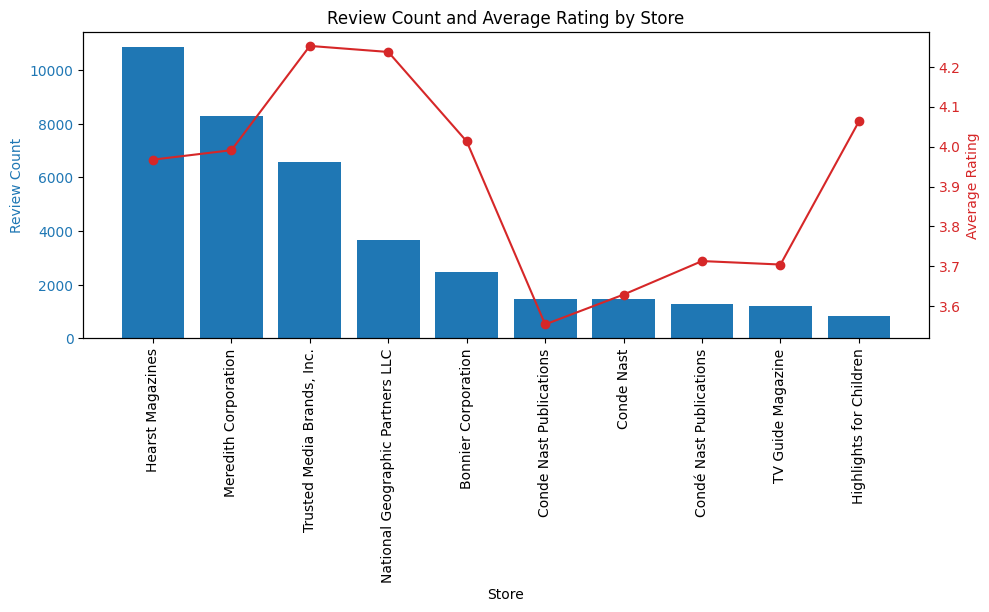

In [36]:
# store별 리뷰 개수와 평균 평점을 시각화 (리뷰 개수로 상위 10개만 출력)

store_stats_top10 = store_stats.sort_values(by='review_count', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Store')
ax1.set_ylabel('Review Count', color=color)
ax1.bar(store_stats_top10['store'], store_stats_top10['review_count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(store_stats_top10['store'], rotation=90)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Rating', color=color)
ax2.plot(store_stats_top10['store'], store_stats_top10['average_rating'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Review Count and Average Rating by Store')
plt.show()

In [37]:
df_merged.to_csv('amazon_reviews_merged.csv', index=False)

In [38]:
df_merged.head(5).to_csv('amazon_reviews_merged_head.csv', index=False)